<a href="https://colab.research.google.com/github/Nymisha-ruby/Experiments/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Book1.xlsx')

In [ ]:
matches = pd.read_excel('/content/drive/MyDrive/Book2.xlsx')

In [ ]:
data.sample(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
185613,1216519,2,14,5,S Dube,Washington Sundar,R Ashwin,6,0,6,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Delhi Capitals
140250,1082606,1,19,2,JJ Roy,KD Karthik,JJ Bumrah,4,0,4,0,0,NaN,NaN,NaN,NaN,Gujarat Lions,Mumbai Indians
193417,1237181,1,5,2,SS Iyer,RR Pant,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
32991,419130,1,19,6,Harbhajan Singh,R McLaren,RG Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Deccan Chargers
22191,392219,2,10,5,AB de Villiers,KD Karthik,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Kolkata Knight Riders
74000,548372,2,1,3,DA Warner,UBT Chand,Z Khan,6,0,6,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Royal Challengers Bangalore
126628,980935,2,14,6,EJG Morgan,DJ Hooda,AR Patel,2,0,2,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Kings XI Punjab
47021,501222,1,9,4,G Gambhir,JH Kallis,DL Vettori,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3104,335995,2,16,6,IK Pathan,Yuvraj Singh,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Delhi Daredevils
42757,501203,1,6,2,MS Bisla,JH Kallis,A Mishra,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers


In [ ]:
#matches.sample(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
390,598066,Dharamsala,2013-05-18,Azhar Mahmood,Himachal Pradesh Cricket Association Stadium,0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,50.0,N,NaN,HDPK Dharmasena,CK Nandan
665,1136590,Pune,2018-04-30,SR Watson,Maharashtra Cricket Association Stadium,0,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Chennai Super Kings,runs,13.0,N,NaN,AY Dandekar,C Shamshuddin
283,548343,Chennai,2012-04-28,Mandeep Singh,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,bat,Kings XI Punjab,runs,7.0,N,NaN,BF Bowden,SK Tarapore
242,501266,Bangalore,2011-05-22,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,K Hariharan,RE Koertzen
262,548320,Kolkata,2012-04-13,Shakib Al Hasan,Eden Gardens,0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,Asad Rauf,S Asnani
732,1178412,Delhi,2019-04-20,SS Iyer,Feroz Shah Kotla,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,field,Delhi Capitals,wickets,5.0,N,NaN,UV Gandhe,C Shamshuddin
791,1216527,Sharjah,2020-09-27,SV Samson,Sharjah Cricket Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN,RK Illingworth,K Srinivasan
157,419148,Bangalore,2010-04-10,R Vinay Kumar,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,K Hariharan,DJ Harper
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma
780,1216516,Dubai,2020-10-02,PK Garg,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,7.0,N,NaN,AK Chaudhary,PR Reiffel


In [ ]:
data.shape

(193468, 18)

In [ ]:
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [ ]:
data.nunique()

id                  816
inning                2
over                 20
ball                  9
batsman             537
non_striker         530
bowler              420
batsman_runs          7
extra_runs            7
total_runs            8
non_boundary          2
is_wicket             2
dismissal_kind        9
player_dismissed    506
fielder             879
extras_type           5
batting_team         15
bowling_team         15
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
batsmen = data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [ ]:
top_batsmen = batsmen.sort_values(by='runs', ascending=False)[:10]
top_batsmen

,batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

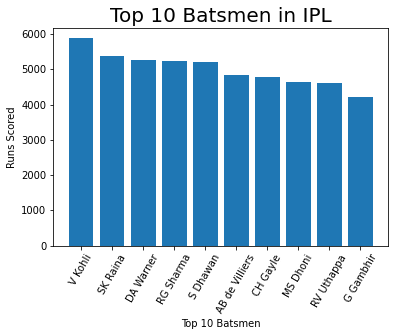

In [ ]:
#plotting the batsmen and the runs scored by them
plt.bar(top_batsmen['batsman'], top_batsmen['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsmen in IPL',size=20)

In [ ]:
innings = data.groupby(['batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='inning_runs')

In [ ]:
best_innings = innings.sort_values(by='inning_runs', ascending=False)[:10]
best_innings

,batsman,inning_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [22]:
bowlers = data[data['dismissal_kind'] != 'run out']
bowlers = data.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers 

index  wickets
bowler                             
A Ashish Reddy 0     66652   bowled
               1     66657   caught
               2     67823   caught
               3     68326   caught
               4     69158   caught
...                    ...      ...
Z Khan         114  140648   caught
               115  148376   bowled
               116  148429   caught
               117  149278  run out
               118  149401   caught

[9495 rows x 2 columns]

Top Venues

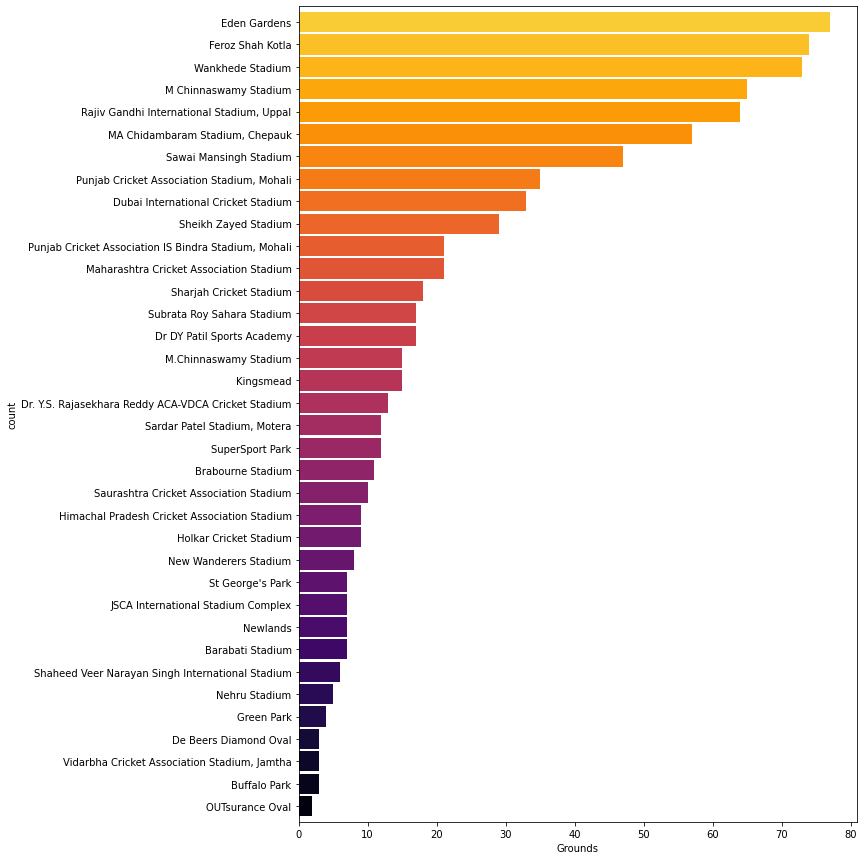

In [ ]:
plt.subplots(figsize=(10,15))
ax=matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()


10 Mosts Played Venue in the History of IPL from 2008 to 2020

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


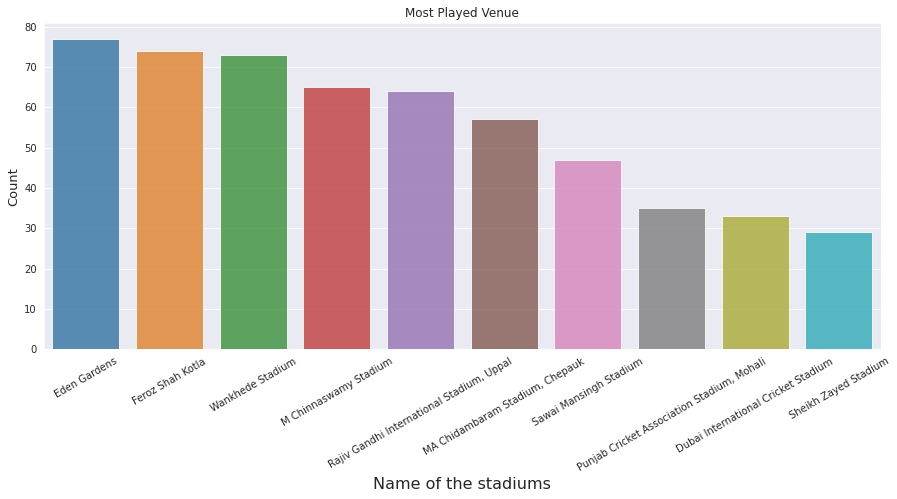

In [ ]:
sns.set_style("darkgrid")
ls=matches['venue'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(15,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played Venue')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Name of the stadiums', fontsize=16)
Most_Played.set_xticklabels(rotation=30, labels=ls.index, fontsize=10)
plt.show()

Top players of the matches

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


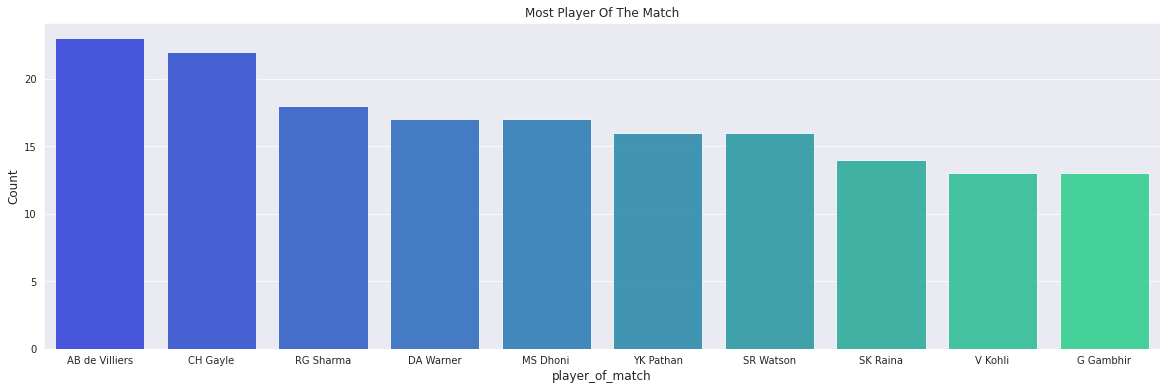

In [ ]:
players = matches['player_of_match'].value_counts()
players = players[:10]

sns.set_style("darkgrid")
plt.figure(figsize=(20,6))

players=sns.barplot(players.index, players.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)

plt.show()